# Travail numérique de PHYS-F-302 
## Safae Ben Ayad & Guillaume Houyoux

### Introduction & quelques équations

Pour ce travail, nous nous interessons à un type d'écoulement, soit $\textbf{l'écoulement de Stokes}$. Plus concretement, nous voudrons résoudre $\textbf{l'équation biharmonique}$ dans le but de résoudre numériquement l'écoulement de Stokes dans une cavité carrée.

$\textbf{L'écoulement de Stokes}$ s'agit d'un écoulement dont les effets dû à la force de viscosité du liquide sont très importants par rapport aux effets dûs à d'autres forces comme, par exemple, la force d'inertie. Un écoulement peut être supposé de Stokes dans un certain cadre; ce cadre est delimité par une condition sur le $\textbf{nombre de Reynolds (Re)}$ étant que celui-ci soit inférieur à 1. 

Le nombre de Reynolds, donné ci-dessous, représente le rapport entre les forces d'inertie et les forces visqueuses ce qui implique que un Re plus petit que 1 revient à notre énonciation précédente où nous affirmons que les écoulements de Stokes sont dominés par des forces dûes à la viscosité. 

$${\displaystyle \mathrm {Re} ={\frac {uL}{\nu }}}$$

où $\nu$ est la viscosité, $u$ la vitesse et $L$ une longueur caractéristique.

De plus, ce nombre permet de réecrire l'equation de $\textbf{Navier-Stokes}$ (sous l'hypothèse d'écoulement incompressible) qui suit comme étant une équation non dimensionnelle (1): 

 \begin{eqnarray}
\frac{\partial u}{\partial t} + u \cdot \nabla u = -\frac{1}{\rho}\nabla p + \nu\nabla^2 u 
\end{eqnarray}


\begin{eqnarray} 
 Re \left(\frac{\partial u^*}{\partial t} + u^* \cdot \nabla u^* \right) = -\nabla p^* + \nabla^2 u^*   \text{ (1)}
\end{eqnarray}

où  $u^*$ et $p^*$ sont les coefficients adimensionnels pour la vitesse et la pression respectivement.
  
Afin de trouver l'écoulement de Stokes, nous supposons que Re tend vers 0 de manière à retrouver l'équation suivante

\begin{equation}
 - \nabla p + \nabla^2 u = 0
\end{equation}

Et si nous appliquons le rotationnel des deux cotés, il en résulte: 

\begin{equation}
0 = \nabla \times 0 = \nabla \times \left( - \nabla p + \nabla^2 u\right)
\end{equation}

Sachant que le rotationnel du gradient d'un scalaire est nul, 
\begin{equation}
\nabla \times (- \nabla p) = - \nabla \times \nabla p = 0
\end{equation}

nous obtenons finalement l'équation suivante: 

\begin{equation}
 0 = \nabla \times \nabla^2 u =\nabla^2\omega
\end{equation}

en terme du vecteur tourbillon (vorticité) qui est donnée par $\omega = \nabla \times u$.

Donc nous avons tout simplement l'équation de Poisson dans le cas homogène, soit $\textbf{l'équation de Laplace}$: 

\begin{equation}
 \nabla ^2 \omega = 0
\end{equation}


Nous avons donc trouvé l'expression pour le tourbillon qui va ensuite nous servir pour trouver $\textbf{l'équation biharmonique}$. Trouvons à présent la formule pour le courant, nous nous plaçons tout d'abord dans le cas où l'écoulement est bidimensionnel et incompressible. Nous pouvons dire que par definition la fonction du courant sera donné par :


$$\begin{equation}
u = \frac{\partial \psi}{\partial y} \text{   et   } v = - \frac{\partial \psi}{\partial x}
\end{equation} $$

Sachant que le tourbillon suit l'axe z, les termes en x et y du rotationnel valent 0 et nous gardons plus que:

\begin{equation}
\omega = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}
\end{equation}

Nous trouvons donc la relation entre $\psi \text{ et } \omega $ en dérivant $\psi$ une deuxième fois par rapport aux deux coordonnées, nous égalisons avec l'expression d'omega; 

\begin{equation}
\nabla^2 \psi = -\omega
\end{equation}

Par le calcul précédent sur le tourbillon, nous savons que $\nabla^2 \omega = 0$, donc nous faisons apparaitre le $\nabla^2 \omega$ à droite de la manière suivante:

\begin{equation}
\boxed{\nabla^4 \psi= 0}
\end{equation}

pour finalement abutir sur l'équation biharmonique souhaitée. Il s'agit de l'équation que nous allons résoudre durant ce travail.

### Écoulement dans une cavité - conditions aux bords 

<img src="./drivencavity.png" width=400px>

Nous voudrons résoudre le problème du courant dans la cavité à couvercle mouvant afin d'examiner l'écoulement de Stokes.

Nous devons supposer pour ce problème que nous avons un couvercle qui se deplace à une vitesse constante $u=1$ et que le fluide ne depasse pas la cavité à travers le bord du couvercle, autrement dit; nous avons imperméabilité des bords, le couvercle étant inclu. Nous supposons également que les parois sont non-glissantes.
Les conditions aux bord-ci dessus sont toute données en terme de la fonction de courant $\psi$.

Sachant donc que le fluide ne sort pas de la cavité, les conditions de Dirichlet seront toutes nulles. En ce qui concerne les conditions de Neumann, nous savons que la parois supérieure a une vitesse égale à $u=1$ et en supposant que les parois sont non glissantes, le flot au long du couvercle aura lui aussi une vitesse constante égale à celle du couvercle. En ce qui concerne les autres bords, ils sont immobiles donc le flot parallèle le sera aussi.


### Discretisation de l'équation biharmonique de second ordre

Nous allons tout d'abord developper notre équation biharmonique en 2D dans un système de coordonnées cartesiennes, de manière à l'avoir sous la forme suivante: 

$$\nabla^4 \psi= \frac{\partial^4 \psi}{\partial x^4}+\frac{\partial^4 \psi}{\partial y^4}+2\frac{\partial^4 \psi}{\partial x^2\partial y^2} = 0$$

Ensuite, nous allons discretiser cette équation d'après la section 05_01_2D.Laplace.Equation en traitant chacun des termes individuellement. Commençant par le premier terme:

$$\begin{align}
\frac{\partial^4 \psi}{\partial x^4} & =  \frac{\partial^2}{\partial x^2}\left(\frac{\partial^2 \psi}{\partial x^2}\right) =\frac{\left(\frac{\partial^2 \psi}{\partial x^2}\right)_{i+1,j}^k-2 \left(\frac{\partial^2\psi}{\partial x^2}\right)_{i,j}^k +\left(\frac{\partial^2 \psi}{\partial x^2}\right)_{i-1,j}^k}{\Delta x^2} \\
& = \frac{\left(\psi_{i+1,j}^k-2\psi_{i,j}^k+\psi_{i-1,j}^k\right)_{i+1,j}^k -2\left(\psi_{i+1,j}^k-2\psi_{i,j}^k+\psi_{i-1,j}^k\right)_{i,j}^k+\left(\psi_{i+1,j}^k-2\psi_{i,j}^k+\psi_{i-1,j}^k\right)_{i-1,j}^k}{\Delta x^4} \\
\end{align}$$

Nous trouvons finalement pour le premier terme la discretization suivante:

$\begin{align} \frac{\partial^4 \psi}{\partial x^4} & = \frac{\psi_{i+2,j}^k - 2\psi_{i+1,j}^k +\psi_{i,j}^k -2 \psi_{i+1,j}^k +4 \psi_{i,j}^k -2\psi_{i-1,j}^k + \psi_{i,j}^k -2 \psi_{i-1,j}^k +\psi_{i-2,j}^k}{\Delta x^4} \\
& = \frac{\psi_{i+2,j}^k-4\psi_{i+1,j}^k+6\psi_{i,j}^k-4\psi_{i-1,j}^k+\psi_{i-2,j}^k}{\Delta x^4} \end{align}$

Idem pour la derivée en $y^4$: 

$\begin{align} \frac{\partial^4 \psi}{\partial y^4} & = \frac{\psi_{i,j+2}^k - 2\psi_{i,j+1}^k +\psi_{i,j}^k -2 \psi_{i,j+1}^k +4 \psi_{i,j}^k -2\psi_{i,j-1}^k + \psi_{i,j}^k -2 \psi_{i,j-1}^k +\psi_{i,j-2}^k}{\Delta y^4} \\
& = \frac{\psi_{i,j+2}^k-4\psi_{i,j+1}^k+6\psi_{i,j}^k-4\psi_{i,j-1}^k+\psi_{i,j-2}^k}{\Delta y^4} \end{align}$

En ce qui concerne le terme mix $\frac{\partial^4 \psi}{\partial x^2\partial y^2}$, nous discretisons de manière similaire d'abord la discretization par rapport à x ensuite par rapport à y:


$\begin{align} \frac{\partial^4 \psi}{\partial x^2\partial y^2} & =
\frac{\partial^2}{\partial x^2}\left(\frac{\partial^2 \psi}{\partial y^2}\right) \\ 
& =  \frac{\left(\frac{\partial^2 \psi}{\partial y^2}\right)_{i+1,j}^k-2 \left(\frac{\partial^2\psi}{\partial y^2}\right)_{i,j}^k + \left(\frac{\partial^2 \psi}{\partial y^2}\right)_{i-1,j}^k}{\Delta x^2}\end{align}$


$$ = \frac{\left(\psi_{i,j+1}^k-2\psi_{i,j}^k+\psi_{i,j-1}^k\right)_{i+1,j}^k -2\left(\psi_{i,j+1}^k-2\psi_{i,j}^k+\psi_{i,j-1}^k\right)_{i,j}^k+\left(\psi_{i,j+1}^k-2\psi_{i,j}^k+\psi_{i,j-1}^k\right)_{i-1,j}^k}{\Delta x^2\Delta y^2}\\
 = \frac{\psi_{i+1,j+1}^k -2\psi_{i+1,j}^k+\psi_{i+1,j-1}^k-2\psi_{i,j+1}^k+4\Psi_{i,j}^k-2\psi_{i,j-1}^k+\psi_{i-1,j+1}^k-2\psi_{i-1,j}^k+\psi_{i-1,j-1}^k}{\Delta x^2\Delta y^2}$$

Si nous prenons $\Delta x^2 = \Delta y^2$, nous aboutissons sur l'expression suivante pour $2\frac{\partial^4 \psi}{\partial x^2\partial y^2}$ :

$$ \frac{2\psi_{i+1,j+1}^k -4\psi_{i+1,j}^k+2\psi_{i+1,j-1}^k-4\psi_{i,j+1}^k+8\psi_{i,j}^k-4\psi_{i,j-1}^k+2\psi_{i-1,j+1}^k-4\psi_{i-1,j}^k+2\psi_{i-1,j-1}^k}{\Delta x^4} $$

Finalement, nous avons: 
$$\nabla^4 \psi = \left(20\psi_{i,j}^k +2\psi_{i+1,j+1}^k +2\psi_{i+1,j-1}^k +2\psi_{i-1,j+1}^k +2\psi_{i-1,j-1}^k +\psi_{i+2,j}^k +\psi_{i-2,j}^k+ \psi_{i,j+2}^k +\psi_{i,j-2}^k -8\psi_{i+1,j}^k -8\psi_{i-1,j}^k -8\psi_{i,j+1}^k  -8\psi_{i,j-1}^k \right)\frac{1}{\Delta x^4} = 0$$

### Implementation des conditions aux bord 

En utilisant les coefficients de discretization  $\textit{forward}$ et $\textit{backward}$ trouvé à la réference suivante: https://en.wikipedia.org/wiki/Finite_difference_coefficient, nous allons implémenter les différences finies de second ordre des conditions aux bords.

Commençons par les C.B. de Dirichlet:

$$\left.\psi_{i,j}\right|_{x=0}=0$$

$$\left.\psi_{i,j}\right|_{x=nx}=0$$

$$\left.\psi_{i,j}\right|_{y=0}=0$$

$$\left.\psi_{i,j}\right|_{y=ny}=0 $$

Sachant que $ny$ et $nx$ sont le nombre de points. Donc en $x=nx$ il s'agit de la position $x = Lx$ où $L$ sera la longueur de la cavité et $y=ny$ serait $y = Ly$ où $L$ est la hauteur de la cavité prétendument (origine dans le coin bas à gauche).

Continuons, à présent nous allons discretiser les C.B. de Neumann:

$\textit{foward}$
$\left.\frac{\partial \psi}{\partial x}\right|_{x = 0} = \frac{-3/2 \psi_{i,j}^k +2 \psi_{i+1,j}^k -1/2 \psi_{i+2,j}^k}{\Delta x} = 0$

$\textit{backward}$
$\left.\frac{\partial \psi}{\partial x}\right|_{x = nx} = \frac{3/2 \psi_{i,j}^k -2 \psi_{i-1,j}^k +1/2 \psi_{i-2,j}^k}{\Delta x} = 0$

$\textit{foward}$
$\left.\frac{\partial \psi}{\partial y}\right|_{y = 0} = \frac{-3/2 \psi_{i,j}^k +2 \psi_{i,j+1}^k -1/2 \psi_{i,j+2}^k}{\Delta y} = 0$

$\textit{backward}$
$\left.\frac{\partial \psi}{\partial y}\right|_{y = ny} = \frac{3/2 \psi_{i,j}^k -2 \psi_{i,j-1}^k + 1/2 \psi_{i,j-2}^k}{\Delta y} = 1$

Et en tenant compte des conditions de Dirichlet que nous avons ecrit un peu plus haut dans celles de Neumann, nous obtenons les 4 équations suivantes: 


$$\begin{align}
4\psi_{i+1,j}^k & = \psi_{i+2,j}^k  \text{ pour la parois de gauche }\\
4\psi_{i-1,j}^k & = \psi_{i-2,j}^k  \text{ pour la parois de droite } \\
4\psi_{i,j+1}^k & = \psi_{i,j+2}^k  \text{ pour la parois du bas } \\
4\psi_{i,j-1}^k & = \psi_{i,j-2}^k - 2\Delta y  \text{ pour le couvercle } \end{align}$$


In [1]:
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline 

from math import pi

Implémontons à présent notre matrice $m_0$, contenant les C.B.. Nous partons d'une matrices de zéros car à l'état initiale, le système est au repos donc nul pour tous les points internes de la grille de la cavité (internal nodes) mise à part le couvercle qui se déplace à vitesse constante. L'idée étant ici d'utiliser la methode itérative du $\textit{Gradient Conjugé}$ avec une premiere supposition $m_0$ et la modifier de manière à s'approcher de plus en plus de la solution.

In [2]:
#Données du problème

nx, ny = 41, 41    # number of points in each direction        

l = 1. # length of the cavity
h = 1. # height of the cavity

dx = l/(nx-1) # grid spacing in the x direction
dy = h/(ny-1) # grid spacing in the y direction

l1_target_1 = 1e-8 # Condition d'arrêt

In [29]:
m_0 = np.zeros((ny,nx), dtype=float) # matrice initiale de 0's car fluide au repos

# Condition de Dirichlet
m_0[0,:] = 0
m_0[-1,:] = 0 #axe y inversé
m_0[:,0] = 0
m_0[:,-1] = 0 #axe y inversé


# Condition de Neumann 
m_0[1:-1,1] = m_0[1:-1,2]*(1/4)            #  x = 0 (parois de gauche)
m_0[1:-1,-2] = m_0[1:-1,-3]*(1/4)          #  x = nx (parois de droite)
m_0[1,2:-2] = m_0[2,2:-2]*(1/4)            #  y = 0 (parois du bas) 
m_0[-2,2:-2] = m_0[-3,2:-2]*(1/4) - dy/2   #  y = ny (couvercle)  #mouvement de la cavité

print(m_0.shape)

# CB bons ou 2:-2  ?
# vals
# bords sur plot ?
# fonction de biharm bonne?

(41, 41)


### Résolution de l'équation biharmonique 

In [11]:
def L1norm(new, old):
    norm = np.sum(np.abs(new-old))
    return norm

In [54]:
# la fonction A applique l'opérateur A sur psi
def A(psi):
    A_sur_psi = np.zeros((ny,nx), dtype=float)
    A_sur_psi[2:-2,2:-2] = ( 20*psi[2:-2,2:-2] + 2*psi[3:-1,3:-1] + 2*psi[3:-1,1:-3] + 2*psi[1:-3,1:-3] + 2*psi[1:-3,3:-1] 
                            + psi[4:0,2:-2] + psi[2:-2,4:0] + psi[0:-4,2:-2] + psi[2:-2,0:-4]
                            - 8*psi[2:-2,3:-1]- 8*psi[2:-2,1:-3]- 8*psi[3:-1,2:-2]- 8*psi[1:-3,2:-2])*1/dx**4
    
def biharmonic_conjugate_gradient(m_0, b, dx, dy, maxiter=20000, rtol=1e-8):
    """
    Résous l'équation biharmonique à 2D sur une grille uniforme
    avec même espacement dans les 2 directions, 
    en utilisant la méthode du gradient conjugé et un terme de source.
    
    ----------
    m_0 : numpy.ndarray
        la matrice initiale.
    b : numpy.ndarray
        terme de source.
    dx : float
        espacement de la grille en x
    dy : float
        espacement de la grille en y
    maxiter : integer, optional
        nombre maximal d'itérations à effectuer;
        par défaut: 20000.
    rtol : float, optional
        tolérance relative pour la convergence;
        default: 1e-6.

    Returns
    -------
    p : numpy.ndarray
        La solution apres relaxation comme étant un tableau 2D.
    ite : integer
        Nombre d'itérations effectués.
    conv : list
        l'historique des convergence sous forme d'une liste.
    """
    def A(psi):
        A_sur_psi = np.zeros((ny,nx), dtype=float)
        A_sur_psi[2:-2,2:-2] = ( 20*psi[2:-2,2:-2] + 2*psi[3:-1,3:-1] + 2*psi[3:-1,1:-3] + 2*psi[1:-3,1:-3] + 2*psi[1:-3,3:-1] 
                            + psi[4:,2:-2] + psi[2:-2,4:] + psi[0:-4,2:-2] + psi[2:-2,0:-4]
                            - 8*psi[2:-2,3:-1]- 8*psi[2:-2,1:-3]- 8*psi[3:-1,2:-2]- 8*psi[1:-3,2:-2])*1/dx**4
        return A_sur_psi
    
    p = m_0.copy()
    r = np.zeros_like(p)   # initial residual
    Ad = np.zeros_like(p)  # to store the mat-vec multiplication
    conv = []  # convergence history
    diff = rtol + 1  # initial difference
    ite = 0  # iteration index
    # Compute the initial residual.
    r = b - A(p)
    # Set the initial search direction to be the residual.
    d = r.copy()
    while diff > rtol and ite < maxiter:
        pk = p.copy()
        rk = r.copy()
        # Compute the Laplacian of the search direction.
        Ad = A(d)
        # Compute the step size.
        alpha = np.sum(r * r) / np.sum(d * Ad)
        # Update the solution.
        p = pk + alpha * d
        
        # reappliquer les CB: update the BC
        
        m_0[-1,:] = 0
        m_0[0,:] = 0
        m_0[:,0] = 0
        m_0[:,-1] = 0 
               
        m_0[1,2:-2] = m_0[2,2:-2]*(1/4)            
        m_0[-2,2:-2] = m_0[-3,2:-2]*(1/4) - dy/2
        m_0[1:-1,1] = m_0[1:-1,2]*(1/4)            
        m_0[1:-1,-2] = m_0[1:-1,-3]*(1/4)   
        
        # Update the residual.
        r = rk - alpha * Ad
        # Update the search direction.
        beta = np.sum(r * r) / np.sum(rk * rk)
        d = r + beta * d
        
        # Compute the relative L1-norm of the difference.
        diff = L1norm(p, pk)
        conv.append(diff)   # norme entre 2 etapes qui va arreter 
        ite += 1
    return p, ite, conv     #valeurs de la sol, nombre d'itération, convergence ? 

### Plot


648


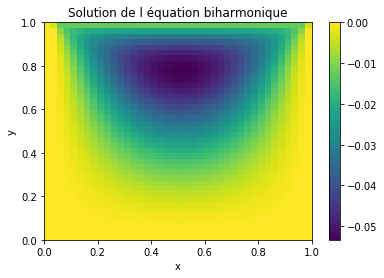

In [55]:
fig, ax = plt.subplots()

x = np.linspace(0,l,nx)
y = np.linspace(0,h,ny)
X,Y = np.meshgrid(x,y)
Z = biharmonic_conjugate_gradient(m_0, 0, dx, dy, maxiter=20000, rtol=1e-8)[0]
print(biharmonic_conjugate_gradient(m_0, 0, dx, dy, maxiter=20000, rtol=1e-8)[1])

pyplot.title('Solution de l équation biharmonique')
pyplot.xlabel('x')
pyplot.ylabel('y')


color = ax.pcolor(X,Y,Z)
cp = fig.colorbar(color)



Text(0,0.5,'y')

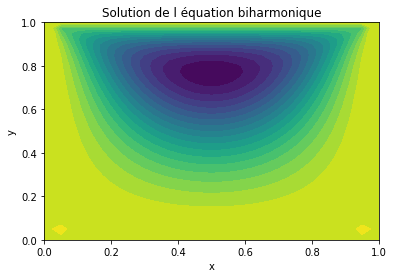

In [56]:
cc = fig.colorbar(plt.contourf(X,Y,Z, 20, cmap = cm.viridis))

pyplot.title('Solution de l équation biharmonique')
pyplot.xlabel('x')
pyplot.ylabel('y')

Quelle est la valeur de la fonction du courant aux points suivant: (0.6,0.2), (0.6,0.4), (0.6,0.6), (0.6,0.8)?
Sachant que nx, ny = 41, 41 ; (1/40 = ee => 0.6/ee, 1/40= ff => 0.2/ff).

In [57]:
print('La valeur de la fonction du courant au point (0.6,0.2) est : {0:f}'.format(Z[8,24]))
print('La valeur de la fonction du courant au point (0.6,0.4) est : {0:f}'.format(Z[16,24]))
print('La valeur de la fonction du courant au point (0.6,0.6) est : {0:f}'.format(Z[24,24]))
print('La valeur de la fonction du courant au point (0.6,0.8) est : {0:f}'.format(Z[32,24]))

La valeur de la fonction du courant au point (0.6,0.2) est : -0.004703
La valeur de la fonction du courant au point (0.6,0.4) est : -0.018196
La valeur de la fonction du courant au point (0.6,0.6) est : -0.038475
La valeur de la fonction du courant au point (0.6,0.8) est : -0.050566


In [58]:
La valeur de la fonction du courant au point (0.6,0.2) est : -0.004702
La valeur de la fonction du courant au point (0.6,0.4) est : -0.018197
La valeur de la fonction du courant au point (0.6,0.6) est : -0.038480
La valeur de la fonction du courant au point (0.6,0.8) est : -0.050575

SyntaxError: invalid syntax (<ipython-input-58-f6632ab4db80>, line 1)

In [48]:
La valeur de la fonction du courant au point (0.6,0.2) est : -0.004703
La valeur de la fonction du courant au point (0.6,0.4) est : -0.018196
La valeur de la fonction du courant au point (0.6,0.6) est : -0.038475
La valeur de la fonction du courant au point (0.6,0.8) est : -0.050566

SyntaxError: invalid syntax (<ipython-input-48-a683fe0e9b89>, line 1)